<a href="https://colab.research.google.com/github/NGUYEN-CONG-VINH/BAI_TAP_TUAN_11_AI/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Nguyễn Công Vinh 20146183
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
from keras.datasets import fashion_mnist
(train_x,train_y),(test_x,test_y)=fashion_mnist.load_data()

In [29]:
train_x.shape

(60000, 28, 28)

In [30]:
train_y.shape

(60000,)

In [31]:
test_x.shape

(10000, 28, 28)

Text(0.5, 1.0, 'so:8')

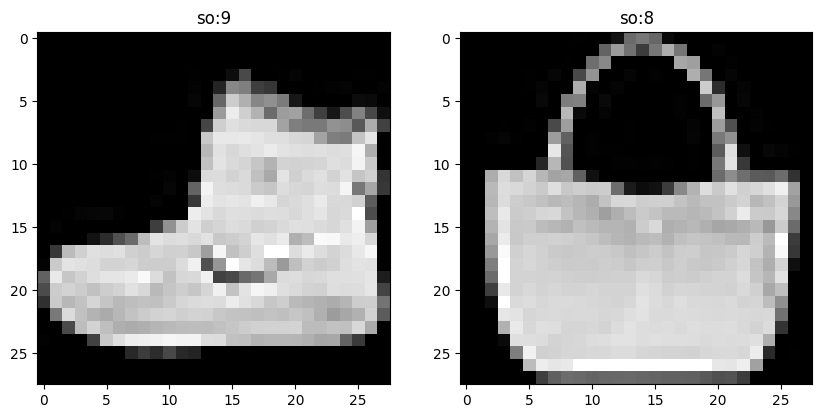

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,10])
plt.subplot(121)
plt.imshow(train_x[0],cmap='gray')
plt.title('so:{}'.format(train_y[0]))
plt.subplot(122)
plt.imshow(train_x[100],cmap='gray')
plt.title('so:{}'.format(train_y[100]))

In [33]:
train_x=train_x.reshape((60000,28,28,1))
train_x=train_x.astype('float32')/255
test_x=test_x.reshape((10000,28,28,1))
test_x=test_x.astype('float32')/255
print(train_x.shape)
print(test_x.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [34]:
from keras.utils import to_categorical# chuyển qua one host encording
train_y=to_categorical(train_y)
test_y=to_categorical(test_y)

In [35]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam #toc do hoc 0.01
batch_size=64
epochs=20
classes=10

In [37]:
from keras.layers.attention.multi_head_attention import activation
from keras.layers import LeakyReLU
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(28,28,1),padding='same'))
#from keras.layers.advanced_activations import LeakyRelU
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,kernel_size=(3,3),activation='linear',input_shape=(28,28,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,kernel_size=(3,3),activation='linear',input_shape=(28,28,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))


In [38]:
#đưa về ANN
model.add(Flatten()) #chuyển thành vecto
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

In [44]:
from tensorflow.python import summary
from keras.losses import categorical_crossentropy
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

In [45]:
train = model.fit(train_x,train_y,batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/20
938/938 [==============================] - 132s 139ms/step - loss: 0.4373 - accuracy: 0.8403
Epoch 2/20
938/938 [==============================] - 126s 135ms/step - loss: 0.2712 - accuracy: 0.9011
Epoch 3/20
938/938 [==============================] - 135s 144ms/step - loss: 0.2275 - accuracy: 0.9162
Epoch 4/20
938/938 [==============================] - 140s 149ms/step - loss: 0.1953 - accuracy: 0.9272
Epoch 5/20
938/938 [==============================] - 134s 143ms/step - loss: 0.1709 - accuracy: 0.9368
Epoch 6/20
938/938 [==============================] - 130s 138ms/step - loss: 0.1476 - accuracy: 0.9444
Epoch 7/20
938/938 [==============================] - 127s 135ms/step - loss: 0.1292 - accuracy: 0.9522
Epoch 8/20
938/938 [==============================] - 128s 137ms/step - loss: 0.1104 - accuracy: 0.9581
Epoch 9/20
938/938 [==============================] - 126s 135ms/step - loss: 0.0941 - accuracy: 0.9650
Epoch 10/20
938/938 [==============================] - 129s 137m

In [46]:
model.save('/content/drive/MyDrive/colab/model1_fashion_mnist.h5')

In [ ]:
from keras.models import load_model
model100=load_model('/content/drive/MyDrive/colab/model_fashion_mnist.h5')

Test loss 0.4673660695552826
Test accuracy 0.9187999963760376


Text(0.5, 1.0, 'Traning and Testing Accuracy')

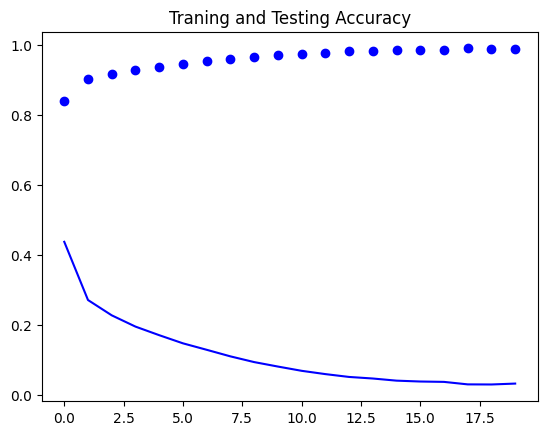

In [49]:
eval=model.evaluate(test_x,test_y,verbose=0)
print('Test loss',eval[0])
print('Test accuracy',eval[1])
accuracy=train.history['accuracy']
val_accuracy=train.history['loss']
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'bo')
plt.plot(epochs,val_accuracy,'b')
plt.title('Traning and Testing Accuracy')
